In [1]:
import numpy as np
import time

In [2]:
def create_table(n, dist_min, dist_max):
    table = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                dist = np.random.randint(dist_min, dist_max)
                table[i, j] = dist
                table[j, i] = dist
    return table

def get_cost(trip, table):
    cost = 0
    for i in range(len(trip)-1):
        dist = table[trip[i], trip[i+1]]
        cost += dist
    return cost


def random_solve_salesman(table):
    n = len(table)
    rand_trip = [-1]*(n+1)
    rand_trip[0] = np.random.randint(0, n)
    for i in range(len(rand_trip)-2):
        random_city = np.random.randint(0, n)
        while random_city in rand_trip:
            random_city = np.random.randint(0, n)
        rand_trip[i+1] = random_city
    rand_trip[-1] = rand_trip[0]
    return rand_trip

def greedy_solve_salesman(table):
    n = len(table)
    greedy_trip = [-1]*(n+1)
    greedy_trip[0] = np.random.randint(0, n)

    for i in range(len(greedy_trip)-2):
        current_city = greedy_trip[i]
        closest_distance = np.inf
        for trial_city in range(0, n):
            dist = table[current_city, trial_city]
            if (dist < closest_distance) and trial_city not in greedy_trip:
                closest_distance = dist
                closest_city = trial_city
        greedy_trip[i+1] = closest_city 

    greedy_trip[-1] = greedy_trip[0]
    return greedy_trip

def greedy_opt_trip(trip, table, n_opt):
    n = len(table)
    opt_trip = trip.copy()
    current_cost = get_cost(opt_trip, table)

    for i in range(n_opt):
        c1_idx = np.random.randint(1, n)
        c2_idx = np.random.randint(1, n)
        c1 = opt_trip[c1_idx]
        c2 = opt_trip[c2_idx]

        trial_trip = opt_trip.copy()
        trial_trip[c1_idx], trial_trip[c2_idx] = c2, c1
        trial_cost = get_cost(trial_trip, table)
        if trial_cost < current_cost:
            opt_trip = trial_trip
            current_cost = trial_cost
    return opt_trip

In [3]:
n_list = (50, 100, 250, 500)
dist_min = 1
dist_max = 100

result_opt_rand = []
result_opt_greedy = []

for n_cities in n_list:
    table = create_table(n_cities, dist_min, dist_max)
    for i in range(10):
        rand_trip = random_solve_salesman(table)
        greedy_trip = greedy_solve_salesman(table)
        
        opt_rand_trip = greedy_opt_trip(rand_trip, table, 1_000_000)
        opt_greedy_trip = greedy_opt_trip(greedy_trip, table, 1_000_000)
        result_opt_rand.append(get_cost(opt_rand_trip, table))
        result_opt_greedy.append(get_cost(opt_greedy_trip, table))
    print(f"calculated 10 results for n = {n_cities}")

rand_50 = result_opt_rand[:50]
rand_100 = result_opt_rand[50:100]
rand_250 = result_opt_rand[100:250]
rand_500 = result_opt_rand[250:]

greedy_50 = result_opt_greedy[:50]
greedy_100 = result_opt_greedy[50:100]
greedy_250 = result_opt_greedy[100:250]
greedy_500 = result_opt_greedy[250:]

calculated 10 re sults for n = 50
calculated 10 re sults for n = 100
calculated 10 re sults for n = 250


KeyboardInterrupt: 

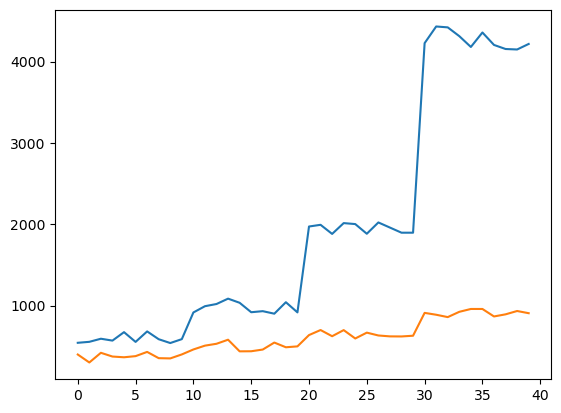

In [ ]:
plt.plot(result_opt_rand)
plt.plot(result_opt_greedy)